# Analysis for Future Expansion Opportunities


![transportation.jpeg](https://github.com/allar14/sales-records-database-analysis-SQL-/blob/main/transportation.jpeg?raw=true)

## <a id='top_1'></a>Table of Content
 - [Introduction](#1)
 - [Exploring the data set](#2)
 - [Analyzing the data set](#3)
 - [Conclusion](#4)


## <a id='1'></a>Introduction 

The Vehicle Distributors, a fictional wholesale distributor of die cast vehicle models, operates globally with customers in over 15 countries. The company has approached us with a dataset analysis task to help them make critical decisions regarding potential future expansion. The objective of this project is to address their inquiries and provide data-driven answers by examining the available data.

The provided dataset, along with its corresponding schema, can be found [here](https://www.mysqltutorial.org/mysql-sample-database.aspx).
The scale model cars database contains eight tables:

 * Customers: customer data
 * Employees: all employee information
 * Offices: sales office information
 * Orders: customers' sales orders
 * OrderDetails: sales order line for each sales order
 * Payments: customers' payment records
 * Products: a list of scale model cars
 * ProductLines: a list of product line categories
 
Table relationships are presented below

![datbase_tables.png](https://github.com/allar14/sales-records-database-analysis-SQL-/blob/main/datbase_tables.png?raw=true)

In [1]:
# Importing all required libraries
import sqlite3
import pandas as pd
import plotly.express as px
import numpy

In [2]:
# loading the extension
%load_ext sql

# initializing the connection to existing database.
%sql sqlite:///stores.db

In [3]:
conn = sqlite3.connect('stores.db')

## <a id='2'></a>Exploring the data set

In [4]:
# Displaying the first five lines from the products table

In [5]:
%%sql
SELECT *
FROM products LIMIT 5;

 * sqlite:///stores.db
Done.


productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.",7933,48.81,95.7
S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,7305,98.58,214.3
S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.",6625,68.99,118.94
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine",5582,91.02,193.66
S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,3252,85.68,136


In [6]:
# List of product lines

In [7]:
%%sql 
SELECT DISTINCT productLine 
FROM productlines p;

 * sqlite:///stores.db
Done.


productLine
Classic Cars
Motorcycles
Planes
Ships
Trains
Trucks and Buses
Vintage Cars


In [8]:
# Counting customers in each country

In [9]:
%%sql
SELECT country, COUNT(customerNumber) as customers
FROM customers c 
GROUP BY TRIM(country);

 * sqlite:///stores.db
Done.


country,customers
Australia,5
Austria,2
Belgium,2
Canada,3
Denmark,2
Finland,3
France,12
Germany,13
Hong Kong,1
Ireland,2


In [10]:
# Retrieve in a single table the table name as a string, 
# the number of attributes and also the number of rows in each table.

In [11]:
%%sql 
SELECT 'customers' table_name, count(*) number_of_attributes,(SELECT count(*)FROM customers ) number_of_rows FROM pragma_table_info('customers')
UNION ALL
SELECT 'products' table_name, count(*) number_of_attributes,(SELECT count(*)FROM products ) number_of_rows FROM pragma_table_info('products')
UNION ALL
SELECT 'productlines' table_name, count(*) number_of_attributes,(SELECT count(*)FROM productlines ) number_of_rows FROM pragma_table_info('productlines')
UNION ALL
SELECT 'orders' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orders ) number_of_rows FROM pragma_table_info('orders')
UNION ALL
SELECT 'orderdetails' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orderdetails ) number_of_rows FROM pragma_table_info('orderdetails')
UNION ALL
SELECT 'payments' table_name, count(*) number_of_attributes,(SELECT count(*)FROM payments ) number_of_rows FROM pragma_table_info('payments')
UNION ALL
SELECT 'employees' table_name, count(*) number_of_attributes,(SELECT count(*)FROM employees ) number_of_rows FROM pragma_table_info('employees')
UNION ALL
SELECT 'offices' table_name, count(*) number_of_attributes,(SELECT count(*)FROM offices ) number_of_rows FROM pragma_table_info('offices');

 * sqlite:///stores.db
Done.


table_name,number_of_attributes,number_of_rows
customers,13,122
products,9,110
productlines,4,7
orders,7,326
orderdetails,5,2996
payments,4,273
employees,8,23
offices,9,7


## <a id='3'></a> <a id='list_of_questions'></a>[Analyzing the data set](#list_of_questions)

The aim of the project is to analyze data from a sales records database and extract valuable information to facilitate decision-making. Effective data analysis in sales has demonstrated its ability to derive key performance indicators (KPIs), leading to more informed and efficient decision-making processes. 
By leveraging data analysis, valuable time, resources, and money can be saved. Sales data analysis encompasses various aspects such as sales performance, production, customer experience, and employee efficiency, which introduces a range of challenges to address. In order to achieve the project's goal, we will explore the following questions to uncover actionable insights.

- [Question 1:](#Question_1) Which Products Should We Order More of or Less of?
- [Question 2:](#Question_2) How should we tailor marketing and communication strategies to customer behaviors?
- [Question 3:](#Question_3) How much can we spend on acquiring new customers?
- [Question 4:](#Question_4) For optimal returns, which countries should be the focus of our marketing efforts?
- [Question 5:](#Question_5) Determine the most and least favorable categories for each country.
- [Question 6:](#Question_6) What was the sales performance throughout the entire duration when sales were recorded?
- [Question 7:](#Question_7) Evaluate the performance of our current sales team.
- [Question 8:](#Question_8) Are there any items in our stock that have not been sold at all?
- [Question 9:](#Question_9) Provide a list of top spenders from each country.

### <a id='Question_1'></a>Question 1: Which Products Should We Order More of or Less of?

The question pertains to inventory reports, specifically focusing on two aspects: identifying low stock items (i.e., products in demand) and analyzing product performance. By addressing these areas, the aim is to enhance supply optimization and improve user experience by preventing popular products from running out of stock. 
Priority for restocking is given to products with high product performance that are close to becoming out of stock. This approach ensures that the most successful and sought-after products are replenished promptly, aligning with the goal of maintaining adequate inventory levels and meeting customer demands.

In [12]:
# Compute the top 10 low stock for each product 

In [13]:
%%sql
SELECT p.productCode ,p.productName ,sum(o.quantityOrdered)/p.quantityInStock as low_stock
FROM products p 
JOIN orderdetails o ON p.productCode = o.productCode 
GROUP BY p.productCode 
ORDER BY low_stock DESC 
LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,low_stock
S24_2000,1960 BSA Gold Star DBD34,67
S12_1099,1968 Ford Mustang,13
S32_4289,1928 Ford Phaeton Deluxe,7
S32_1374,1997 BMW F650 ST,5
S72_3212,Pont Yacht,2
S700_3167,F/A 18 Hornet 1/72,1
S700_1938,The Mayflower,1
S50_4713,2002 Yamaha YZR M1,1
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,1
S18_2795,1928 Mercedes-Benz SSK,1


In [14]:
# Compute the top 10 product performance for each product

In [15]:
%%sql
SELECT p.productCode ,p.productName, round(sum(o.quantityOrdered*o.priceEach),2) as product_performance
FROM orderdetails o 
JOIN products p ON p.productCode = o.productCode 
GROUP BY p.productCode 
ORDER BY product_performance DESC 
LIMIT 10;

 * sqlite:///stores.db
Done.


productCode,productName,product_performance
S18_3232,1992 Ferrari 360 Spider red,276839.98
S12_1108,2001 Ferrari Enzo,190755.86
S10_1949,1952 Alpine Renault 1300,190017.96
S10_4698,2003 Harley-Davidson Eagle Drag Bike,170686.0
S12_1099,1968 Ford Mustang,161531.48
S12_3891,1969 Ford Falcon,152543.02
S18_1662,1980s Black Hawk Helicopter,144959.91
S18_2238,1998 Chrysler Plymouth Prowler,142530.63
S18_1749,1917 Grand Touring Sedan,140535.6
S12_2823,2002 Suzuki XREO,135767.03


In [16]:
# Display priority products for restocking

In [17]:
%%sql
WITH 
tab1 AS (
SELECT 
	p.productCode
FROM
	(
	SELECT
		p.productCode ,
		p.productName ,
		sum(o.quantityOrdered)/ p.quantityInStock as low_stock
	FROM
		products p
	JOIN orderdetails o ON
		p.productCode = o.productCode
	GROUP BY 
		p.productCode
	ORDER BY 
		low_stock DESC) p ),
tab2 AS (
SELECT 
	p.productCode
FROM
	(
	SELECT
		p.productCode ,p.productLine,
		p.productName,
		round(sum(o.quantityOrdered * o.priceEach),
		2) as product_performance
	FROM
		orderdetails o
	JOIN products p ON
		p.productCode = o.productCode
	GROUP BY 
		p.productCode
	ORDER BY 
		product_performance DESC
	LIMIT 10)p)
SELECT
	p.productCode, p.productName,p.productLine
FROM
	products p
WHERE
	p.productCode IN tab1
	AND p.productCode IN tab2;

 * sqlite:///stores.db
Done.


productCode,productName,productLine
S10_1949,1952 Alpine Renault 1300,Classic Cars
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles
S12_1099,1968 Ford Mustang,Classic Cars
S12_1108,2001 Ferrari Enzo,Classic Cars
S12_2823,2002 Suzuki XREO,Motorcycles
S12_3891,1969 Ford Falcon,Classic Cars
S18_1662,1980s Black Hawk Helicopter,Planes
S18_1749,1917 Grand Touring Sedan,Vintage Cars
S18_2238,1998 Chrysler Plymouth Prowler,Classic Cars
S18_3232,1992 Ferrari 360 Spider red,Classic Cars


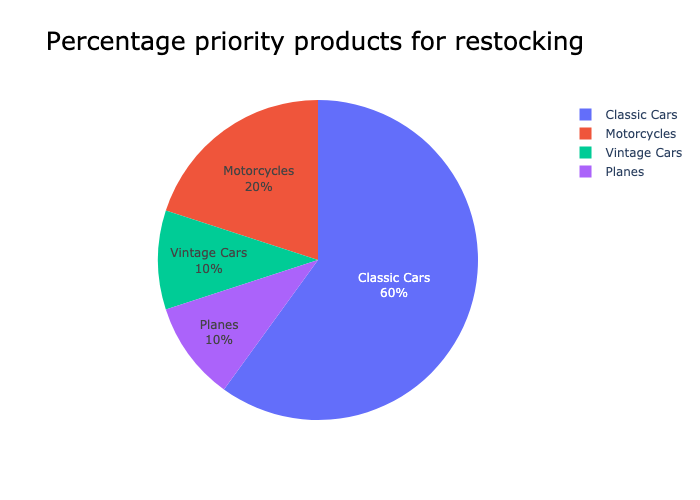

In [18]:
dataset1 = pd.read_sql_query("""WITH 
tab1 AS (
SELECT 
	p.productCode
FROM
	(
	SELECT
		p.productCode ,
		p.productName ,
		sum(o.quantityOrdered)/ p.quantityInStock as low_stock
	FROM
		products p
	JOIN orderdetails o ON
		p.productCode = o.productCode
	GROUP BY 
		p.productCode
	ORDER BY 
		low_stock DESC) p ),
tab2 AS (
SELECT 
	p.productCode
FROM
	(
	SELECT
		p.productCode ,p.productLine,
		p.productName,
		round(sum(o.quantityOrdered * o.priceEach),
		2) as product_performance
	FROM
		orderdetails o
	JOIN products p ON
		p.productCode = o.productCode
	GROUP BY 
		p.productCode
	ORDER BY 
		product_performance DESC
	LIMIT 10)p),
tab3 AS (SELECT
	p.productCode, p.productName,p.productLine
FROM
	products p
WHERE
	p.productCode IN tab1
	AND p.productCode IN tab2),
tab4 AS(
	SELECT COUNT(productLine)countProductLine 
	FROM tab3 )	
SELECT productLine, count(productLine)*100/(SELECT countProductLine FROM tab4) as percentage
FROM tab3
GROUP BY productLine
ORDER BY productLine DESC""", conn)

fig = px.pie(dataset1, values='percentage', names='productLine',
             title='Percentage priority products for restocking')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Percentage priority products for restocking',
                  title_font_color="Black",title_font_size= 25,
                  title_x=0.45)
fig.show("png")

According to the pie chart, classic cars are in high demand and are the priority for restocking, with motorcycles closely following. The demand for vintage cars and planes, however, seems to be relatively steady and evenly spread.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_2'></a>Question 2: How Should We Match Marketing and Communication Strategies to Customer Behavior?

In order to address the second question regarding customer information, our focus will be on categorizing customers into two distinct groups: VIP (Very Important Person) customers and those who display lower levels of engagement. This categorization allows us to develop targeted strategies to meet the unique needs of each group. 

In [19]:
# Compute how much profit each customer generates

In [20]:
%%sql
SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC;

 * sqlite:///stores.db
Done.


customerNumber,profit
141,326519.66
124,236769.39
151,72370.09
114,70311.07
119,60875.3
148,60477.38
187,60095.86
323,60013.99
131,58669.1
450,55931.37


In [21]:
# Find the top five VIP customers

In [22]:
%%sql
WITH performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC)
SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, profit
FROM customers c 
JOIN performance ON performance.customerNumber = c.customerNumber 
LIMIT 5;

 * sqlite:///stores.db
Done.


name,city,country,profit
Freyre Diego,Madrid,Spain,326519.66
Nelson Susan,San Rafael,USA,236769.39
Young Jeff,NYC,USA,72370.09
Ferguson Peter,Melbourne,Australia,70311.07
Labrune Janine,Nantes,France,60875.3


In [23]:
# Find the top five least-engaged customers

In [24]:
%%sql
WITH performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit)
SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, profit
FROM customers c 
JOIN performance ON performance.customerNumber = c.customerNumber  
LIMIT 5;

 * sqlite:///stores.db
Done.


name,city,country,profit
Young Mary,Glendale,USA,2610.87
Taylor Leslie,Brickhaven,USA,6586.02
Ricotti Franco,Milan,Italy,9532.93
Schmitt Carine,Nantes,France,10063.8
Smith Thomas,London,UK,10868.04


We can implement a two-pronged strategy to cater to both groups of customers. For VIP customers, we can organize exclusive events and initiatives aimed at fostering loyalty and further enhancing their satisfaction. For less engaged customers, we can launch specific campaigns and initiatives to re-engage them, boosting their interest and involvement with our brand. By tailoring our efforts based on customer categorization, we can effectively drive loyalty among our VIP customers and revitalize the engagement of those who are less engaged.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_3'></a>Question 3: How Much Can We Spend on Acquiring New Customers?

In order to establish an appropriate budget for acquiring new customers, it is essential to calculate the Customer Lifetime Value (LTV), which indicates the average monetary value generated by a customer over their entire relationship with a business. This calculation allows us to determine the optimal amount that can be allocated towards marketing efforts.

In [25]:
# Compute the average of customer profits

In [26]:
%%sql
WITH  performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit)
SELECT  round(avg(profit),2) as LTV
FROM performance;

 * sqlite:///stores.db
Done.


LTV
39039.59


The Lifetime Value (LTV) metric provides insights into the profitability generated by an average customer over their entire relationship with our store. It enables us to make predictions about future profits. For instance, if we acquire ten new customers next month, we can anticipate earning $390,395. This prediction allows us to make informed decisions regarding the amount we can allocate towards acquiring new customers.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_4'></a>Question 4: For optimal returns, which countries should be the focus of our marketing efforts?

Due to the costs involved in marketing, it is crucial to identify markets where our strategy will result in the highest profit. By targeting these markets, we can ensure that our marketing efforts generate the greatest return on investment and contribute to maximizing profitability.

In [27]:
%%sql
SELECT c.country , round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY c.country 
ORDER BY profit DESC
LIMIT 5;

 * sqlite:///stores.db
Done.


country,profit
USA,1308815.59
Spain,440004.54
France,413016.12
Australia,222207.18
New Zealand,189506.58


Based on the the result above, it is advisable to concentrate our efforts on targeting markets located across three different continents: North America represented by the USA, Europe represented by Spain and France, and Oceania represented by Australia and New Zealand. By focusing our marketing efforts on these specific markets, we can allocate resources efficiently and focus on capturing the most promising opportunities within these regions, ultimately enhancing our overall business performance.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_5'></a>Question 5: Determine the most and least favorable categories for each country

Using the quantity of product lines ordered as our criteria, we will analyze the "order details" table to determine the best and worst-performing product lines in each country. By examining the representation of these product lines in the "orders" table, we can identify which ones are performing exceptionally well and which ones are lagging behind in each specific country.

In [28]:
%%sql
WITH 
best_category AS 
(SELECT country, productLine, max(profit) as max_profit
FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY TRIM(c.country) ,p.productLine
ORDER BY profit DESC)
GROUP BY TRIM(country)
ORDER BY max_profit DESC),
worst_category AS 
(SELECT country, productLine, min(profit) as min_profit
FROM (SELECT c.country ,p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber  
GROUP BY TRIM(c.country) ,p.productLine
ORDER BY profit DESC)
GROUP BY TRIM(country)
ORDER BY min_profit DESC)
SELECT best_category.country as Country,best_category.productLine as Best_Category, 
best_category.max_profit as Max_Profit,worst_category.productLine as Worst_Category, 
worst_category.min_profit as Min_Profit
FROM best_category
JOIN worst_category ON best_category.country = worst_category.country
GROUP BY best_category.country,best_category.productLine;

 * sqlite:///stores.db
Done.


Country,Best_Category,Max_Profit,Worst_Category,Min_Profit
Australia,Classic Cars,71331.4,Trains,1004.85
Austria,Classic Cars,37725.09,Ships,3332.43
Belgium,Vintage Cars,15374.27,Trains,2364.48
Canada,Classic Cars,25081.93,Motorcycles,983.18
Denmark,Classic Cars,55211.95,Trains,2759.88
Finland,Classic Cars,55937.56,Trains,1956.54
France,Classic Cars,164755.55,Trains,5670.23
Germany,Classic Cars,51386.03,Trucks and Buses,1670.64
Hong Kong,Planes,14113.27,Motorcycles,489.65
Ireland,Classic Cars,10418.83,Vintage Cars,847.56


The analysis clearly shows that Classic cars are the most favored product category, commanding a significant share of 85.7%. Planes are the next preferred category with a share of 9.5%, followed by Vintage cars at 4.8%.

On the contrary, Trains stand out as the least favored category, comprising a substantial portion of 62%. Motorcycles constitute 14.3% of the least favored category, while Vintage cars account for 9.5%. Ships, Trucks and Buses, along with Classic cars, each represent a modest 4.8% among the least favored categories.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_6'></a>Question 6: What was the sales performance throughout the entire duration when sales were recorded?

In order to assess performance, we will shift our focus to monthly sales performance based on the profits generated in each month. By analyzing the profitability achieved during each month, we can determine the relative success of that particular month. A higher profit indicates a better-performing month, while a loss signifies a less favorable month.

In [29]:
%%sql
WITH order_shipped AS
(SELECT p.customerNumber , strftime('%Y-%m', p.paymentDate) as year_month, p.amount
FROM payments p 
JOIN orders o ON o.customerNumber =p.customerNumber 
WHERE status = "Shipped"
ORDER BY year_month)
SELECT year_month, round(sum(amount),2)as total
FROM order_shipped osh
JOIN customers c ON c.customerNumber = osh.customerNumber
GROUP BY year_month
ORDER BY year_month;

 * sqlite:///stores.db
Done.


year_month,total
2003-01,89351.87
2003-02,1247289.83
2003-03,599113.44
2003-04,642905.52
2003-05,655731.4
2003-06,599498.29
2003-07,1197111.09
2003-08,2229925.11
2003-09,444833.59
2003-10,1777878.91


It is better for the future analysis to visualize the result above. 

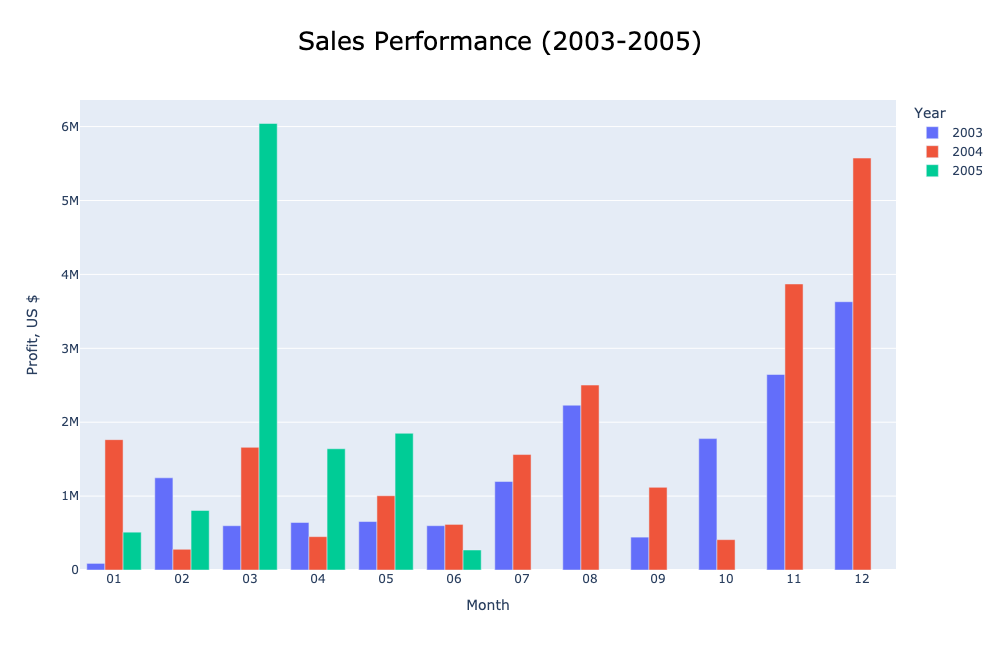

In [39]:
dataset = pd.read_sql_query("""WITH order_shipped AS
(SELECT p.customerNumber , strftime('%m', p.paymentDate) as month, 
strftime('%Y', p.paymentDate) as year, p.amount
FROM payments p 
JOIN orders o ON o.customerNumber =p.customerNumber 
WHERE status = "Shipped"
ORDER BY month, year)
SELECT month,year, round(sum(amount),2)as total
FROM order_shipped osh
JOIN customers c ON c.customerNumber = osh.customerNumber
GROUP BY month, year 
ORDER BY month, year""", conn)

fig1 = px.bar(dataset, x="month", y="total", orientation='v', color = 'year',barmode = 'group',
              labels={"month":"Month", "total": "Profit, US $", "year": "Year"},
              title='Sales Performance (2003-2005)',width=1000,height= 650)
fig1.update_layout(
    title_font_color="Black",
    title_font_size= 25,
    title_x = 0.5 )
fig1.show("png")

The given dataset covers a period of 2.5 years, revealing notable spikes in November and December of 2004, as well as March of 2005. 
Additionally, there is a consistent trend of decreasing profit from April to June during this time frame. This decline in profit could potentially be attributed to various factors or reasons. Some possible explanations might include changes in market demand, increased competition, seasonal fluctuations, economic conditions, or internal operational challenges. 

###### [to the list of Questions](#list_of_questions)

## <a id='Question_7'></a>Question 7: Evaluate the performance of our current sales team

The Vehicle Distributors have developed a plan to expand their sales staff. Before proceeding with the expansion of the sales team, it is crucial to evaluate the performance of the current sales team. Additionally, we need to identify the top-performing sales employee in each country for recognition and acknowledgement.

In [31]:
# Performance of the current sales team

In [32]:
%%sql           
WITH best_employee AS 
(SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber 
JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
GROUP BY e.employeeNumber 
ORDER BY c.city,profit DESC)
SELECT lastName ||" "|| firstName as name ,jobTitle, city, country, productLine, profit
FROM best_employee
ORDER BY country;

 * sqlite:///stores.db
Done.


name,jobTitle,city,country,productLine,profit
Fixter Andy,Sales Rep,Melbourne,Australia,Motorcycles,222207.18
Castillo Pamela,Sales Rep,Kobenhavn,Denmark,Classic Cars,340727.9
Bondur Loui,Sales Rep,Paris,France,Classic Cars,234891.07
Jones Barry,Sales Rep,Frankfurt,Germany,Vintage Cars,276659.25
Marsh Peter,Sales Rep,Auckland,New Zealand,Planes,230811.75
Nishi Mami,Sales Rep,Makati City,Philippines,Classic Cars,181181.8
Gerard Martin,Sales Rep,Barcelona,Spain,Ships,156878.63
Hernandez Gerard,Sales Rep,Madrid,Spain,Classic Cars,504644.71
Bott Larry,Sales Rep,Manchester,UK,Classic Cars,290203.59
Thompson Leslie,Sales Rep,Las Vegas,USA,Vintage Cars,138031.47


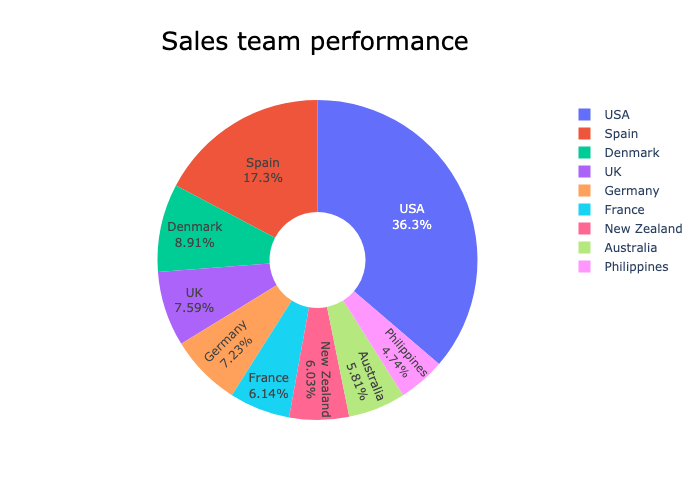

In [33]:
dataset2 = pd.read_sql_query("""WITH best_employee AS 
(SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber 
JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
GROUP BY e.employeeNumber 
ORDER BY c.city,profit DESC)
SELECT  country, productLine,round(sum(profit),2) as total_profit
FROM best_employee
GROUP BY country, productLine
ORDER BY country DESC""", conn)
fig = px.pie(dataset2, values='total_profit', names='country',hole=.3,
             title='Sales team performance')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales team performance',
                  title_font_color="Black",title_font_size= 25,
                  title_x=0.45)
fig.show("png")

From the pie chart above it is evident that the USA sales team generates the highest profit for the company. This is understandable considering that the USA sales team represents 40% of the total sales across all countries.
Following the USA sales team, the sales team in Spain takes the second position in terms of profitability.

In [34]:
# Top-performing sales employee in each country

In [35]:
%%sql
WITH best_employee AS 
(SELECT c.country,c.city, e.employeeNumber ,e.lastName ,e.firstName ,e.jobTitle ,
p.productLine, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode 
JOIN customers c ON o.customerNumber = c.customerNumber 
JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber 
GROUP BY e.employeeNumber 
ORDER BY profit DESC)
SELECT lastName ||" "|| firstName as name ,jobTitle,city,country, productLine, max(profit) as max_profit
FROM best_employee
GROUP BY country
ORDER BY max_profit DESC;

 * sqlite:///stores.db
Done.


name,jobTitle,city,country,productLine,max_profit
Hernandez Gerard,Sales Rep,Madrid,Spain,Classic Cars,504644.71
Jennings Leslie,Sales Rep,San Francisco,USA,Vintage Cars,435208.35
Castillo Pamela,Sales Rep,Kobenhavn,Denmark,Classic Cars,340727.9
Bott Larry,Sales Rep,Manchester,UK,Classic Cars,290203.59
Jones Barry,Sales Rep,Frankfurt,Germany,Vintage Cars,276659.25
Bondur Loui,Sales Rep,Paris,France,Classic Cars,234891.07
Marsh Peter,Sales Rep,Auckland,New Zealand,Planes,230811.75
Fixter Andy,Sales Rep,Melbourne,Australia,Motorcycles,222207.18
Nishi Mami,Sales Rep,Makati City,Philippines,Classic Cars,181181.8


Recognizing and acknowledging the efforts of your top-performing sales employee is crucial for boosting morale, motivation, and overall team performance.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_8'></a>Question 8: Are there any items in our stock that have not been sold at all?

Deadstock refers to products that have remained unsold for an extended period. They can become a financial burden as they occupy storage space and may eventually result in losses due to potential damage. Dealing with deadstock presents challenges, as there is a risk of them remaining unsold and potentially incurring additional costs.

In [36]:
%%sql
SELECT productCode, productName,quantityInStock , buyPrice
FROM products p 
WHERE productCode NOT IN (SELECT productCode FROM orderdetails o);

 * sqlite:///stores.db
Done.


productCode,productName,quantityInStock,buyPrice
S18_3233,1985 Toyota Supra,7733,57.01


One potential strategy to address the slow-moving inventory is to consider implementing price reductions for the deadstock items. While it may seem counterintuitive to decrease prices and potentially earn less revenue on underperforming products, this approach could make the items more appealing to potential buyers. By offering lower prices compared to competitors (or even selling the product at cost), you can accelerate the sales process and ultimately save money in the long term. Holding onto these items for an extended period only prolongs the associated costs to your business.

###### [to the list of Questions](#list_of_questions)

## <a id='Question_9'></a>Question 9: Provide a list of top spenders from each country

In order to encourage our valued customers to spend more at our store, we have compiled a list of top spenders from each country, sorted alphabetically by country. Recognizing and appreciating their loyalty and support, we hope to inspire them to continue their patronage and further enhance their shopping experiences with us.

In [37]:
#Find the customer from each country that has spent 
# the most money at our store, ordered alphabetically by country.

In [38]:
%%sql
WITH  performance AS
(SELECT o.customerNumber, round(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON od.orderNumber = o.orderNumber
JOIN products p ON p.productCode = od.productCode
GROUP BY o.customerNumber
ORDER BY profit DESC)
SELECT c.contactLastName ||" "||c.contactFirstName as name,c.city,c.country, max(profit) as max_money_spent
FROM customers c 
JOIN performance ON performance.customerNumber = c.customerNumber 
GROUP BY c.country
ORDER BY  c.country;

 * sqlite:///stores.db
Done.


name,city,country,max_money_spent
Ferguson Peter,Melbourne,Australia,70311.07
Pipps Georg,Salzburg,Austria,54724.68
Dewey Catherine,Bruxelles,Belgium,25861.96
Tamuri Yoshi,Vancouver,Canada,28882.99
Petersen Jytte,Kobenhavn,Denmark,50973.68
Suominen Kalle,Espoo,Finland,40095.85
Labrune Janine,Nantes,France,60875.3
Pfalzheim Henriette,Köln,Germany,36744.01
Gao Mike,Central Hong Kong,Hong Kong,16868.68
Cassidy Dean,Dublin,Ireland,19588.29


To acknowledge the customer who has spent the most money at your store, you can consider the following:
    - Encourage the customer to share their thoughts, feedback, or suggestions about their experiences with your company.
    - As a gesture of appreciation, provide the customer with exclusive benefits or rewards,such as VIP access to upcoming sales or events, special discounts. 
    - Send a personalized thank-you note or a small gift to express your gratitude for their loyalty and support.

###### [to the list of Questions](#list_of_questions)

## <a id='4'></a>Conclusion

  Products:
   - To capitalize on the popularity of Classic cars, it could be beneficial to highlight their historical significance and associated stories, thereby increasing their value and demand among customers.
   - To gain a better understanding of why certain product lines are less favored, it would be useful to implement further categorization beyond the existing product line. For example, for Trains, creating sub-categories based on the year of manufacture or specific dates could provide insights into customers' preferences for different models.
   - There is only one product classified as Deadstock, it is advisable not to hold onto it, as it is currently impacting profits. Reducing the price of this product could be a viable strategy to clear out the inventory and recoup a portion of the costs. Taking action promptly is crucial to prevent severe losses, such as potential damage to the product.


  Customers:
  - By genuinely acknowledging and personalizing our interactions with customers, we can cultivate long-term relationships and encourage repeat business.
  - It is important to recognize and reward loyal customers. For our VIP customers, we can organize exclusive events and initiatives that are tailored to foster loyalty and enhance their satisfaction. These specialized offerings will create a sense of exclusivity and strengthen their bond with our brand.
  - For customers who show less engagement, we can launch targeted campaigns and initiatives to rekindle their interest and increase their involvement. By identifying their specific needs and preferences, we can design compelling promotions and experiences that resonate with them, ultimately reigniting their enthusiasm for our brand.


  Sales representatives:
  - Overall, the sales representatives are performing well, and it is important to keep them motivated to encourage customers in their respective regions to make larger purchases and increase order frequency.
  - One effective method to boost motivation is by publicly acknowledging the top-performing sales employee. This recognition not only celebrates their achievements but also inspires other team members. Personalized rewards such as bonuses, commissions, or gift cards can be offered to recognize their outstanding performance. Additionally, organizing team celebrations or events such as a team lunch, a recognition ceremony, or an outing can further demonstrate appreciation for their hard work and dedication.
    By implementing these strategies, we can create a motivating environment that recognizes and rewards sales representatives for their exceptional performance while inspiring others to excel in their roles.


  Company:
  - The spikes of profit in November and December of 2004 could be attributed to increased sales during the holiday season when consumer spending tends to rise. Similarly, the spike in March of 2005 could be associated with seasonal factors such as spring sales or specific events or promotions during that period. The company might have implemented effective marketing campaigns or promotional activities during the mentioned months, resulting in increased sales and profitability. Special offers, discounts, or advertising efforts could have contributed to the observed spikes.
  - The decreasing profit during the period from April to June could be attributed to several factors. One possible reason is a seasonal decline in customer demand during spring and early summer months. Additionally, increased competition or market saturation might have contributed to reduced sales and profit margins. Other factors such as economic fluctuations, changes in consumer behavior, or internal operational challenges could also have played a role in the declining profit trend.
    In order to accurately identify the specific cause of the profit decrease during this period, conducting further analysis and gathering additional contextual information is essential. To gain a comprehensive understanding of the factors influencing the profit decrease, it would be valuable to collect data pertaining to overhead costs associated with each order, including fees and discounts. Additionally, gathering data on credits or refunds issued for damaged goods would contribute to a more thorough analysis.
    

  Existing Market:
  - A strategic approach would be to prioritize the marketing efforts on three key continents: North America (specifically the USA), Europe (represented by Spain and France), and Oceania (Australia and New Zealand). By concentrating our resources and focusing on these targeted markets, we can maximize efficiency and capitalize on the most promising opportunities within these regions. This targeted approach will contribute to enhancing our overall business performance.

###### [back to the top](#top_1)